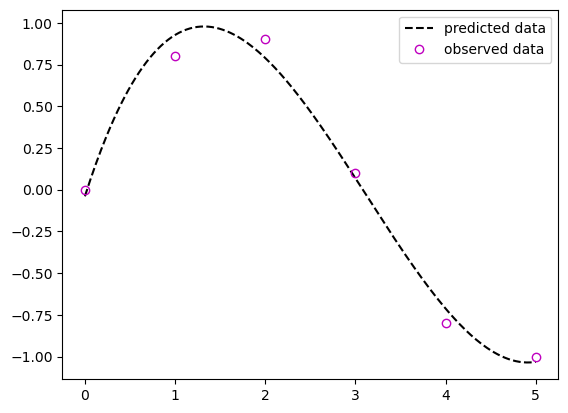

a0 = -0.03968253968479929
a1 = 1.6931216931231892
a2 = -0.8134920634960108
a3 = 0.08703703703504462
The R2 value was calculated to be0.987
The R2_adj value was calculated to be 0.936
(array([-0.03968254,  1.69312169, -0.81349206,  0.08703704]), 0.9871991807475679, 0.9359959037378393)


In [2]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def polynomial_fit(x, *coefficients):
    """
    Polynomial fitting equation
    """
    return sum(coefficients[i] * x**i for i in range(len(coefficients)))

def predict(x, y, degree):
    try:
        if len(x) >= (degree + 1):
            initial_guess = np.ones(degree + 1)  # Generate initial guess for coefficients
            popt, pcov = curve_fit(polynomial_fit, x, y, p0=initial_guess)
            x_test = np.linspace(x[0], x[-1], 250)
            y_pred = polynomial_fit(x, *popt)

            plt.plot(x_test, polynomial_fit(x_test, *popt), 'k--', label='predicted data')
            plt.plot(x, y, 'mo', mfc='None', label='observed data')
            plt.legend()
            plt.show()

            # Print coefficients
            for i, coef in enumerate(popt):
                print(f'a{i} = {coef}')

            # Calculate R-squared
            residuals = y - y_pred
            ss_res = np.sum(residuals**2)
            ss_tot = np.sum((y - np.mean(y))**2)
            r_squared = 1 - (ss_res / ss_tot)

            # Calculate adjusted R-squared
            n = len(y)
            k = degree + 1
            r_squared_adjusted = 1 - ((1 - r_squared) * (n - 1) / (n - k - 1))

            print(f'The R2 value was calculated to be {r_squared:.3f}')
            print(f'The R2_adj value was calculated to be {r_squared_adjusted:.3f}')

            return popt, r_squared, r_squared_adjusted
        else:
            raise ValueError('Please provide more x-values')
    except Exception as e:
        raise e


x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])

print(predict(x, y, 3))
